<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Digital-Image-Processing/blob/main/Image_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Noise Models

In [4]:
def uniform_noise(size,prob=0.1):
  levels=int((prob*255)//2)
  noise=np.random.randint(-levels,levels,size)

  return noise

In [13]:
!wget https://www.researchgate.net/profile/Kuo-Kun-Tseng-2/publication/267425806/figure/fig3/AS:292964459925508@1446859578443/a-the-denoised-image-is-modified-by-using-the-rules-for-gray-level-replacement-and-b.png

--2021-09-23 08:18:00--  https://www.researchgate.net/profile/Kuo-Kun-Tseng-2/publication/267425806/figure/fig3/AS:292964459925508@1446859578443/a-the-denoised-image-is-modified-by-using-the-rules-for-gray-level-replacement-and-b.png
Resolving www.researchgate.net (www.researchgate.net)... 104.17.33.105, 104.17.32.105, 2606:4700::6811:2069, ...
Connecting to www.researchgate.net (www.researchgate.net)|104.17.33.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1331 (1.3K) [image/png]
Saving to: ‘a-the-denoised-image-is-modified-by-using-the-rules-for-gray-level-replacement-and-b.png’

a-the-denoised-imag 100%[===================>]   1.30K  --.-KB/s    in 0s      

2021-09-23 08:18:00 (30.8 MB/s) - ‘a-the-denoised-image-is-modified-by-using-the-rules-for-gray-level-replacement-and-b.png’ saved [1331/1331]



In [23]:
img1=imageio.imread("a-the-denoised-image-is-modified-by-using-the-rules-for-gray-level-replacement-and-b.png")

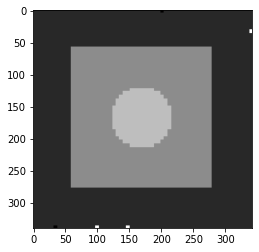

In [24]:
plt.imshow(img1,cmap="gray")

In [26]:
#img1=np.unique(img1)

In [27]:
img1=img1[:,:,0]

In [28]:
img1

Array([[255,  40,  40, ...,  40,  40,  40],
       [255,  40,  40, ...,  40,  40,  40],
       [255,  40,  40, ...,  40,  40,  40],
       ...,
       [255,  40,  40, ...,  40,  40,  40],
       [255,  40,  40, ...,  40,  40,  40],
       [255,  40,  40, ...,  40,  40,  40]], dtype=uint8)

In [29]:
uni_noise=uniform_noise(img1.shape,prob=0.15)
img_uni=np.clip(img1.astype(int)+uni_noise,0,255)

In [30]:
hist_img=np.histogram(img1,bins=256,range=(0,255))
hist_img_uni=np.histogram(img_uni,bins=256,range=(0,255))

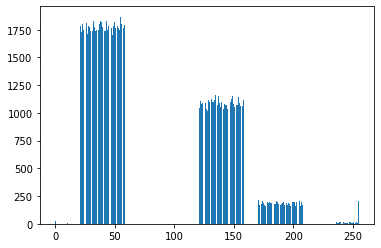

In [31]:
plt.bar(np.arange(256),hist_img_uni[0])
plt.show()

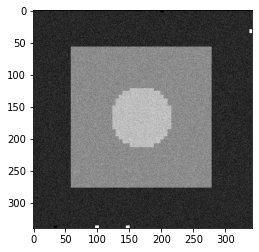

In [35]:
plt.imshow(img_uni,cmap="gray")

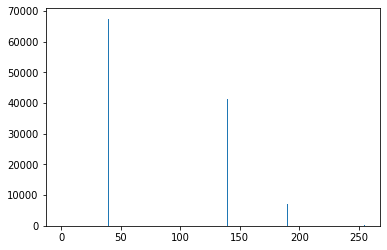

In [32]:
plt.bar(np.arange(256),hist_img[0])
plt.show()

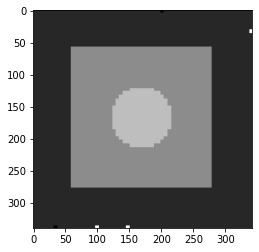

In [36]:
plt.imshow(img1,cmap="gray")

In [37]:
def gaussian_noise(size,mean=0,std=0.01):
  noise=np.multiply(np.random.normal(mean,std,size),255)
  return noise

In [38]:
gau_noise=gaussian_noise(img1.shape,mean=0,std=0.05)
img_gau=np.clip(img1.astype(int)+gau_noise,0,255)

In [39]:
hist_gau=np.histogram(img_gau,bins=256,range=(0,255))

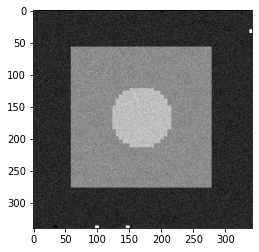

In [42]:
plt.imshow(img_gau,cmap="gray")
plt.show()

<BarContainer object of 256 artists>

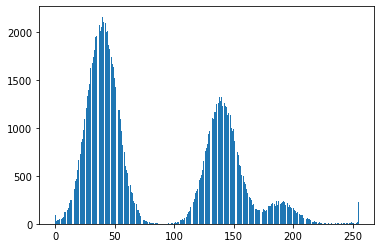

In [45]:
plt.bar(np.arange(256),hist_gau[0])

In [46]:
def impulsive_noise(image,prob=0.1,mode="salt_and_pepper"):
  noise=np.array(image,copy=True)
  for x in np.arange(image.shape[0]):
    for y in np.arange(image.shape[1]):
      rnd=np.random.random()
      if rnd<prob:
        rnd=np.random.random()
        if rnd>0.5:
          noise[x,y]=255
        else:
          noise[x,y]=0
  return noise

In [47]:
img_impulse=np.clip(img1.astype(int)+impulsive_noise(img1),0,255)

In [48]:
hist_imp=np.histogram(img_impulse,bins=256,range=(0,255))

<BarContainer object of 256 artists>

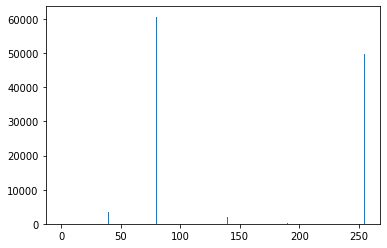

In [53]:
plt.bar(np.arange(0,256),hist_imp[0])

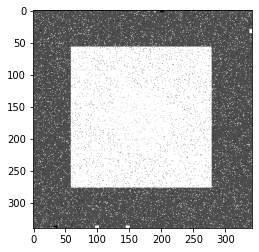

In [58]:
plt.imshow(img_impulse,cmap="gray")

# Denoising

In [59]:
uni_noise_new=uniform_noise(img1.shape,prob=0.1)
img_uni_res=img_uni-uni_noise_new

In [60]:
def rmse(f,g):
  return np.sqrt(np.mean(np.square(f-g)))

In [65]:
rmse(img_uni_res,img1)

12.947381006311687

# Denoising filters

In [66]:
from scipy.fftpack import fftn,ifftn,fftshift

In [71]:
f=imageio.imread("a-the-denoised-image-is-modified-by-using-the-rules-for-gray-level-replacement-and-b.png")[:,:,0]
g=f+gaussian_noise(f.shape,mean=0,std=0.08)
g=np.clip(g.astype(int),0,255)

In [72]:
# mean filter
w_mean=np.ones([5,5])/float(5*5)

In [75]:
def fft_imagefilter(g,w):
  pad1=(g.shape[0]//2)-(w.shape[0]//2)
  wp=np.pad(w,(pad1,pad1-1),"constant",constant_values=0)

  W=fftn(wp)
  G=fftn(g)
  R=np.multiply(W,G)
  
  r=np.real(fftshift(ifftn(R)))

  return r

In [78]:
r_mean=fft_imagefilter(g[:340,:340],w_mean)

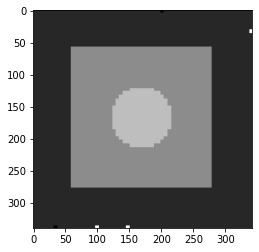

In [82]:
plt.imshow(f,cmap="gray")
plt.show()

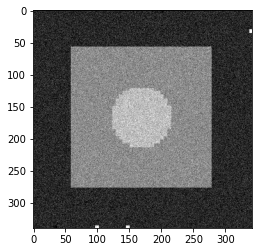

In [84]:
plt.imshow(g,cmap="gray")
plt.show()

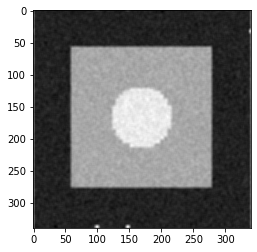

In [83]:
plt.imshow(r_mean,cmap="gray")
plt.show()

In [85]:
def median_filter(g,k):
  a=k//2
  r=np.zeros(g.shape)
  for x in np.arange(a,g.shape[0]-a+1):
    for y in np.arange(a,g.shape[1]-a+1):
      med_region=np.median(g[x-a:x+a+1,y-a:y+a+1])
      r[x,y]=med_region
  return r

In [86]:
r_median=median_filter(g,5)

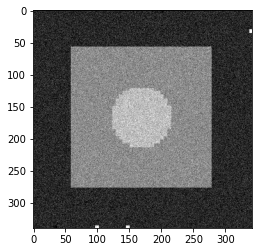

In [90]:
plt.imshow(g,cmap="gray")

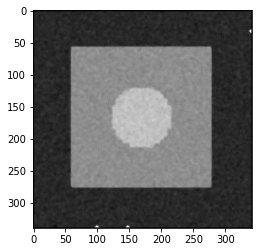

In [89]:
plt.imshow(r_median,cmap="gray")

In [91]:
img_imp=impulsive_noise(img1,prob=0.2)

In [93]:
w_mean3=np.ones([3,3])/float(3*3)
img_mean=fft_imagefilter(img_imp[:340,:340],w_mean3)
img_median=median_filter(img_imp,3)

Text(0.5, 1.0, 'median filtered image')

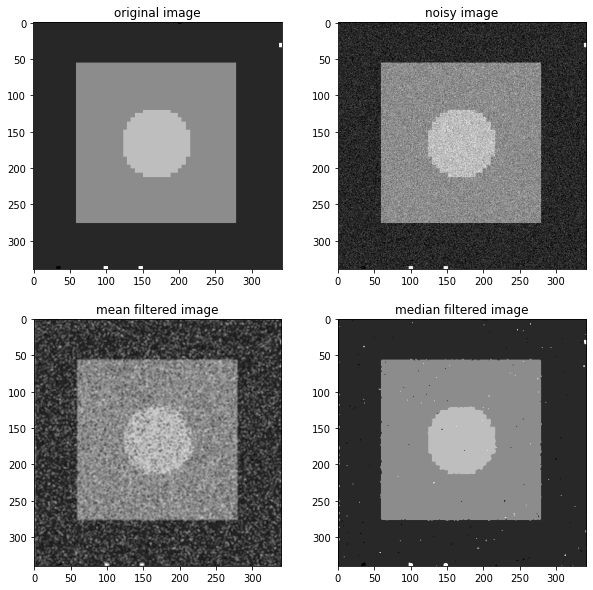

In [98]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img1,cmap="gray")
plt.title("original image")

plt.subplot(222)
plt.imshow(g,cmap="gray")
plt.title("noisy image")

plt.subplot(223)
plt.imshow(img_mean,cmap="gray")
plt.title("mean filtered image")

plt.subplot(224)
plt.imshow(img_median,cmap="gray")
plt.title("median filtered image")